# Cross validation


In [8]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Rozważmy następujący zbiór punktów:

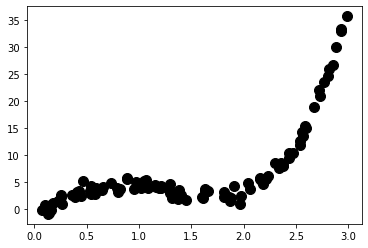

In [9]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.9).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i oceń wyniki na części testowej.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50,) (50,)
(50,) (50,)


In [11]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [12]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([ 0.81972486,  5.97538733,  2.67227735, 23.92084772,  5.48671431,
        0.46743435,  4.97773674,  2.93215468,  0.34704989,  0.41952724,
        4.60124761,  6.38459446,  2.58172762,  0.34653542,  1.00211241,
        0.77023467, 13.10911768,  2.55971783,  5.98029753,  8.72212214,
       11.69073048,  0.40153036,  2.09380374,  2.80014413,  3.09581605,
        0.38584593,  0.34088774,  2.05522834,  3.28663986,  4.88214413,
       15.22290537,  1.03482065,  0.35525802,  0.41519335,  0.50944014,
        6.73165479,  4.65060342,  5.25658276, 20.95597771, 23.9244243 ,
       10.76070035,  4.45954256,  0.73594298,  4.93558536, 19.3002024 ,
       21.12794899,  6.9306119 ,  1.42672372,  2.76964504,  0.97349836])

In [13]:
from sklearn import  metrics
print("R^2: {}".format(metrics.r2_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

R^2: 0.7643746959176176
Explained variance score: 0.7668390473251265
Median absolute error: 3.259433167982109
Mean squared error: 14.08532167681345
Mean absolute errors: 3.125621959936696


# Zadanie
Wylicz powyższe miary dla wszytkich modeli:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [ ]:
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', ?? ))
models.append(('PR5', ?? ))
models.append(('PR10', ?? ))
models.append(('PR15', ?? ))
models.append(('PR25', ?? ))

for name, model in models:
    print(name)
    model.fit(X_train, y_train)
#     print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
#     print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
#     print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Train mean squared error: {}".format( metrics.mean_squared_error(y_train, model.predict(X_train)) ))
    print("Test mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
#     print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))